In [1]:
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

#### TASK 1 

In [2]:
# build minimal spanning tree on assets correlation matrix
tickers = ['ABG', 'ACWI', 'ADX', 'A', 'AA', 'AAP', 'AAPL', 'ABAX',
           'MMM', 'ABBV', 'ACN', 'ADBE', 'ABNB'
          ]

tick_closes = yf.download(start='2020-01-01', end='2023-12-30', tickers=tickers, interval='1d')['Close'].dropna(axis=1)
tick_returns = tick_closes.pct_change()
tick_corrs = tick_returns.corr().round(2)

[*********************100%%**********************]  13 of 13 completed


1 Failed download:
['ABAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2023-12-30)')


In [20]:
A = tick_corrs.values
min_corr = 0.1
g = ig.Graph.Adjacency(((np.abs(A) > min_corr) & (np.abs(A) < 1)).tolist(), mode='undirected')
g.vs['names'] = [key for key in tick_corrs.columns]
g.es['weight'] = A[(np.abs(A) > min_corr) & (np.abs(A) < 1)]

G = g.to_networkx()
mapping = {i:tickers[i] for i in range(G.number_of_nodes())}
G = nx.relabel_nodes(G, mapping)

Sum of correlations in the minimal spanning tree = 2.79


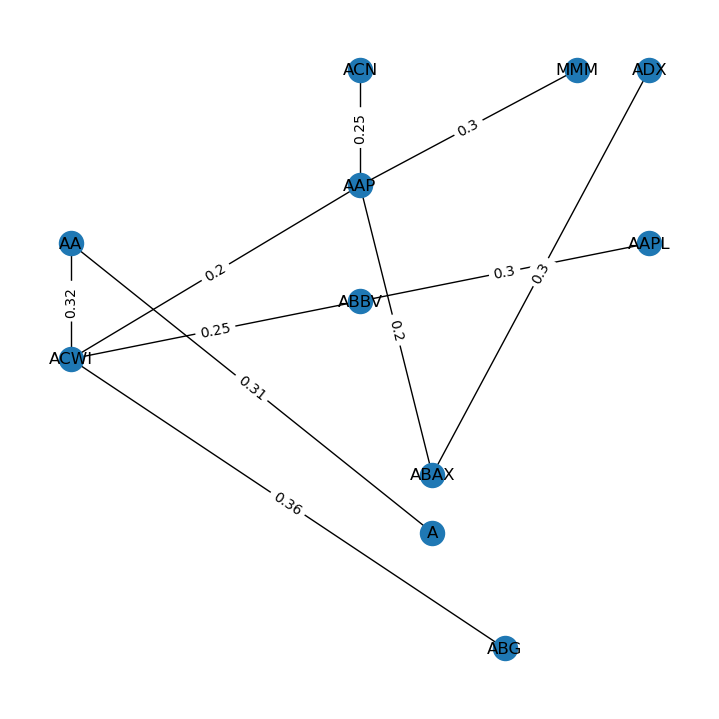

In [34]:
# plot the spanning tree with edge weights as edge labels 
# print sum of corrs

nx_spanning_tree = nx.minimum_spanning_tree(G)
pos = {}
for i, node in enumerate(nx_spanning_tree.nodes):
    nx_spanning_tree.nodes[node]['pos'] = (
        np.random.randint(low=i, high=15),
        np.random.randint(low=i, high=15)
    )
    pos[node] = nx_spanning_tree.nodes[node]['pos']

mapping = {i:tickers[i] for i in range(nx_spanning_tree.number_of_nodes())}
nx_spanning_tree = nx.relabel_nodes(nx_spanning_tree, mapping)
labels = nx.get_edge_attributes(nx_spanning_tree,'weight')

corr_sum = 0
for edge in nx_spanning_tree.edges:
    corr_sum += abs((nx_spanning_tree.get_edge_data(*edge))['weight'])
print(f'Sum of correlations in the minimal spanning tree = {corr_sum}')
    
plt.figure(figsize =(7, 7))
nx.draw(nx_spanning_tree, pos, with_labels = True)
nx.draw_networkx_edge_labels(nx_spanning_tree, pos=pos, edge_labels=labels)
plt.show()

#### TASK 3

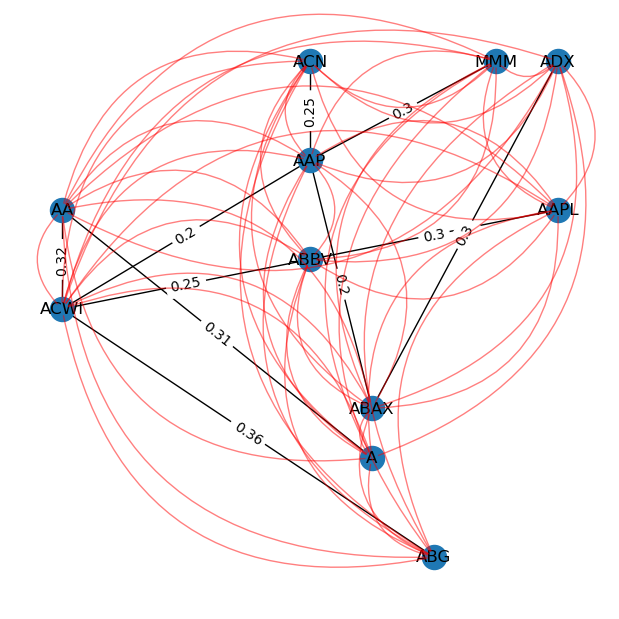

In [35]:
# construct maximal planar graph 
# pos = {}
# for i, node in enumerate(nx_spanning_tree.nodes):
#     G.nodes[node]['pos'] = (
#         np.random.randint(low=i, high=15),
#         np.random.randint(low=i, high=15)
#     )
#     pos[node] = G.nodes[node]['pos']

labels = nx.get_edge_attributes(nx_spanning_tree,'weight')
mapping = {i:tickers[i] for i in range(nx_spanning_tree.number_of_nodes())}
nx_spanning_tree = nx.relabel_nodes(nx_spanning_tree, mapping)
plt.figure(figsize =(6, 6))
nx.draw(nx_spanning_tree,pos, with_labels = True)
_ = nx.draw_networkx_edge_labels(nx_spanning_tree, pos=pos, edge_labels=labels)

ax = plt.gca()
for edge in G.edges():
    ax.annotate("",
                xy=pos[edge[0]], xycoords='data',
                xytext=pos[edge[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color = 'red',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.5", alpha=0.5
                                ),
                )

#### TASK 2

In [316]:
G_reg5 = nx.random_regular_graph(4, 5)
G_reg33 = nx.random_regular_graph(3, 6)

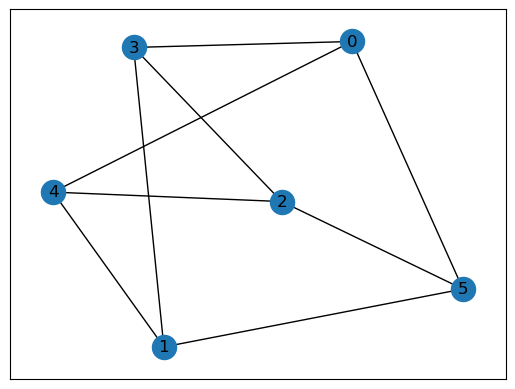

In [323]:
nx.draw_networkx(G_reg33, with_labels = True)

In [324]:
G_big = nx.random_regular_graph(8, 10)

In [333]:
nx.isomorphism.GraphMatcher(G_big, G_reg5).subgraph_is_isomorphic()

True